# Feature Engineering
<center><img src="./images/Engineering.jpg" alt="Engineering" style="width: 800px;"/></center>

### Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.
... according to Wikipedia.org.  
  
Typially an iterative process where new features are generated and tested, e.g. batch-wise.

## Motivation
- GIGO - garbage in, garbage out
- Machine Learning methods are limited, cannot make gold from lead
- Domain knowledge and random or exhaustive feature engineering can unlock patterns hidden from the models


### Example: Kaggle competiton/tutorial - Titanic survival
- Has been compulsory assignment in DAT200
- Few complete features, missing data
- Some information needs decoding, e.g. titles from names
- Combining features smartly wastly increases accuracy

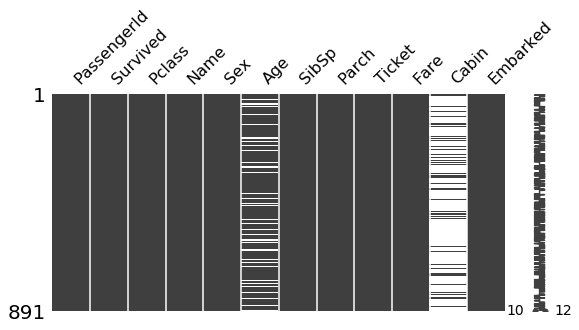

In [3]:
import pandas as pd
import missingno as ms
import matplotlib.pyplot as plt
%matplotlib inline

train_data = pd.read_csv('./data/Titanic_Train.csv')
ms.matrix(train_data, figsize=[9,4])
plt.show()

### A standard machine learning pipeline
<img src="./images/Pipeline.png" alt="Typical Pipeline"/>  
Source: Practical Machine Learning with Python, Apress/Springer

## The process of feature engineering (traditionally):
1. Brainstorming or Testing features;
2. Deciding what features to create;
3. Creating features;
4. Checking how the features work with your model;
5. Improving your features if needed;
6. Go back to brainstorming/creating more features until the work is done.


### 3. Creating features
- Should expand the feature space, preferrably in a non-linear fashion.
- Simple linear combinations typically do not add anything new.
- Polynomial features.
    - Interactions (products / quotients).
- Non-linear functions of single features or feature combinations
- Transformations:
    - log, Box-Cox
<img src="./images/Box_Cox.png" alt="Box-Cox transformation" style="width: 300px;"/>

## Terms from Machine Learning
- Feature combinations/crossing
  - Combinations that cannot be represented by the linear system, e.g. ReLU and friends.
- Feature bucketing
  - Create major categories from continuous or multi class data.
  - https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization.html -> Colab
- Feature templates
  - Implicit generation of new features in a model, or
  - A group of features all computed in a similar way.
      - Length greater than ...
      - Last three characters equals ...
      - Contains character ...
- Feature hashing
  - Use hashing algorithms to create vectors/matrices from complicated predictors.
  - F.ex. dictionary type terms where the vocabulary may grow.
 

### scikit-learn's pre-processing
- Non-linear transformation by quantiles
- Binarization
    - 0 or not (1)
- OneHot encoding
    - Multiple 0 or 1

http://scikit-learn.org/stable/modules/preprocessing.html

### Feature representation
- Re-code timestamps to:
    - day of the year
    - time of day
    - minutes since some event
    - https://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [ ]:
import pandas as pd
two_dates = pd.to_datetime(['2018-07-29', '2018-07-30'])
print(two_dates)
print(two_dates.values.astype('datetime64[m]') + 1)
print(two_dates.values+1)

### Feature representation
- Switch between numeric and categorical/ordinal
    - Length of education => Achieved degree

### External data
- Time series:
    - Connect events on time points
- External APIs: 
    - E.g. Microsoft Computer Vision to count faces in an image (free Azure subscription avilable)
- Geocoding:
    - Convert between street addresses, coordinates, etc.
    - Connect to external data sources based on coordinates

## Rectified Linear Units - ReLU
$f(x)=x^+=max(0,x)$  
  
Non-linear activation function / transformed feature.  
Simple derivative except a discontinuity in 0 $\Rightarrow$ good candidate for activation function in deep neural networks.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def ReLU(x):
    x[x<0] = 0

# Plot effect on straight line
y = np.arange(-1,1,0.1)
fig = plt.figure(figsize=[7,7])
plt.plot(y, label='Original')
ReLU(y)
plt.plot(y, '--', label='ReLU')
plt.legend()
plt.grid()
plt.show()

### Variants
Soft truncation of $x<0$. In deep neural networks this can help against "dead neurons" where a neuron is perpetually inactive. $a$ below is a hyperparameter.  
  
Leaky ReLU:  
$f(x)=max(ax,x)$, for $0 < a < 1$.  
  
Exponential linear unit (ELU):  
$f(x)=max(a(e^x-1),x)$, for $0 < a$.

In [ ]:
def LeakyReLU(x, a):
    x[x<0] = a*x[x<0]

def ELU(x, a):
    x[x<0] = a*(np.exp(x[x<0])-1)

In [ ]:
# Plot effect on straight line
y = np.arange(-1,1,0.1)
fig = plt.figure(figsize=[7,7])
plt.plot(y, label='Original')
LeakyReLU(y,0.1)
plt.plot(y, '--', label='Leaky ReLU')
y = np.arange(-1,1,0.1)
ELU(y,0.1)
plt.plot(y, ':', label='ELU')
plt.legend()
plt.grid()
plt.show()

### Example
Random normal data.

In [ ]:
y = np.sort(np.random.normal(size=[500,1]))
yReLU  = y.copy()
yLReLU = y.copy()
yELU   = y.copy()

ReLU(yReLU)
LeakyReLU(yLReLU,0.25)
ELU(yELU,0.25)

#### Plot sorted values

In [ ]:
fig = plt.figure(figsize=[7,7])
plt.plot(sorted(y), label='Original')
plt.plot(sorted(yReLU), label = 'ReLU')
plt.plot(sorted(yLReLU), label = 'Leaky ReLU (0.25)')
plt.plot(sorted(yELU), label = 'ELU (0.25)')
plt.legend()
plt.grid()
plt.title('Sorted values')
plt
plt.show()

## ReLU on differences
ReLU can also be calcualted on feature combinations, e.g. differences between features, either in a systematic or random way:  
  
$f(x_i,x_j)=(x_i-x_j)^+=max(0,x_i-x_j)$  
  
Added to the original values, these can greatly increase the available feature space for regression or classification methods.
  
![Homer the chef](./images/Bilde1.gif "Homer the chef")  

### Example with MNIST handwritten digits
Perform Logistic Regression with original (scaled) data and data augmented with all pair-wise ReLU'ed differences between pixels.

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
# Pixels as an array
data = digits.data
# Classification target (digits)
target = digits['target']

# Split data
x_train, x_test, y_train, y_test = \
       train_test_split(data, target, 
                        test_size=0.3,
                        random_state=1)
LR = LogisticRegression(penalty='l2', random_state=1)

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=LR, 
                X=x_train, 
                y=y_train, 
                param_name='C', # The paramter to vary
                param_range=param_range, # ... and its values
                cv=5) # Stratified KFold by default

In [ ]:
# Calculate validation curves for training and test sets
train_mean = np.mean(train_scores, axis=1); train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1);   test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.title('Raw pixels')
plt.show()

#### Augmented with ReLU

In [ ]:
from scipy.special import comb

# Systematic differences between all columns of X
def all_differences(X):
    n, n_pred = X.shape
    j = 0
    n_left = n_pred-1
    B = np.zeros([n, comb(n_pred,2,True)]);
    for i in range(n_pred):
        B[:,j+np.arange(n_left)] = X[:,i+1:] - X[:,i,None] # Avoid collapse with None
        j += n_left;
        n_left -= 1;
    return B

In [ ]:
diff_data = all_differences(data)
ReLU(diff_data)
data_augmented = np.hstack([data, diff_data])
print(data.shape)
print(data_augmented.shape)

In [ ]:
print(np.linalg.matrix_rank(data))
print(np.linalg.matrix_rank(data_augmented))

In [ ]:
# Split data
x_train_aug, x_test_aug, y_train, y_test = \
       train_test_split(data_augmented, target, 
                        test_size=0.3,
                        random_state=1)
LR = LogisticRegression(penalty='l2', random_state=1)

# Cross-validate various L2 parameter values 
param_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores_aug, test_scores_aug = validation_curve(
                estimator=LR, 
                X=x_train_aug, 
                y=y_train, 
                param_name='C', # The paramter to vary
                param_range=param_range, # ... and its values
                cv=5) # Stratified KFold by default

In [ ]:
# Calculate validation curves for training and test sets
train_mean_aug = np.mean(train_scores_aug, axis=1); train_std_aug  = np.std(train_scores_aug, axis=1)
test_mean_aug  = np.mean(test_scores_aug, axis=1);  test_std_aug   = np.std(test_scores_aug, axis=1)

plt.plot(param_range, train_mean_aug, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean_aug + train_std_aug,
                 train_mean_aug - train_std_aug, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean_aug, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')
plt.fill_between(param_range, 
                 test_mean_aug + test_std_aug,
                 test_mean_aug - test_std_aug, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.title('Augmented with ReLU')
plt.show()

In [ ]:
print('Maximum accuracy:')
print('Original data: {0:.3f}'.format(max(test_mean)))
print('Augmented data: {0:.3f}'.format(max(test_mean_aug)))

#### Double augmented

In [ ]:
diff_data = np.hstack([all_differences(data),-all_differences(data)])
ReLU(diff_data)
data_augmented2 = np.hstack([data, diff_data])
print(data.shape)
print(data_augmented.shape)

In [ ]:
# Split data
x_train_aug2, x_test_aug2, y_train, y_test = \
       train_test_split(data_augmented2, target, 
                        test_size=0.3,
                        random_state=1)
LR = LogisticRegression(penalty='l2', random_state=1)

# Cross-validate various L2 parameter values (almost 2 minutes on teacher's computer)
param_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores_aug2, test_scores_aug2 = validation_curve(
                estimator=LR, 
                X=x_train_aug2, 
                y=y_train, 
                param_name='C', # The paramter to vary
                param_range=param_range, # ... and its values
                cv=5) # Stratified KFold by default

In [ ]:
# Calculate validation curves for training and test sets
train_mean_aug2 = np.mean(train_scores_aug2, axis=1); train_std_aug2  = np.std(train_scores_aug2, axis=1)
test_mean_aug2  = np.mean(test_scores_aug2, axis=1);  test_std_aug2   = np.std(test_scores_aug2, axis=1)

plt.plot(param_range, train_mean_aug2, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean_aug2 + train_std_aug2,
                 train_mean_aug2 - train_std_aug2, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean_aug2, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')
plt.fill_between(param_range, 
                 test_mean_aug2 + test_std_aug2,
                 test_mean_aug2 - test_std_aug2, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.title('Augmented twice')
plt.show()

In [ ]:
print('Maximum cross-validation accuracy:')
print('Original data: {0:.3f}'.format(max(test_mean)))
print('Augmented data: {0:.3f}'.format(max(test_mean_aug)))
print('Double augmented data: {0:.3f}'.format(max(test_mean_aug2)))

### Test set classifications

In [ ]:
# Original
LR.C = param_range[np.argmax(test_mean)]
LR.fit(x_train, y_train)
accuracy = LR.score(x_test,y_test)

# Augmented
LR.C = param_range[np.argmax(test_mean_aug)]
LR.fit(x_train_aug, y_train)
accuracy_aug = LR.score(x_test_aug,y_test)

# Double augmented
LR.C = param_range[np.argmax(test_mean_aug2)]
LR.fit(x_train_aug2, y_train)
accuracy_aug2 = LR.score(x_test_aug2,y_test)

print('Maximum test set accuracy')
print('Original data: {0:.3f}'.format(accuracy))
print('Augmented data: {0:.3f}'.format(accuracy_aug))
print('Double augmented data: {0:.3f}'.format(accuracy_aug2))

### Bucketing

In [ ]:
## Custom bucketing
df = pd.DataFrame({'normal': np.random.normal(10, 3, 1000)})
print(df.describe().T); print()

custom_bucket_array = np.linspace(0, 20, 9)
custom_bucket_array = [0, 10, 15, 20]
df['bucket'] = pd.cut(df['normal'], custom_bucket_array)
print(custom_bucket_array);print()
print(df.head())

## Automatized feature engineering:
- Deep Feature Synthesis (MIT)
- OneBM (IBM)
- ExploreKit (Berkeley)
<img src="./images/DFS.png" alt="Deep feature syntehsis" style="width: 300px;" align="center" />

Deep Feature Synthesis is available in Python through Featuretools:
- automatic feature engineering for relational and timestamped data
  - e.g. database exports with common keys, time aspect, ...
- mimics human made feature combinations and transformations

Deep Feature Synthesis:
- aggregate data from one table and merge into another (one-to-many relation),  
  e.g. sum, std., max, min., mean, count, percent true, num unique, mode, trend, skew, custom
- transformations in the primary data table
- combinations of the above
- aggregation of aggregations (depth = 2, deep feature), and deeper (harder to interpret)

# -------------------------------------
# TODO: Update from here!
# -------------------------------------

## Example
#### Prediction of olympic medals
Copied from:  
https://github.com/Featuretools/predict-olympic-medals/blob/master/PredictOlympicMedals.ipynb

In [ ]:
import numpy as np
import pandas as pd
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

import featuretools as ft
import utils as utils

%matplotlib inline

In [ ]:
label_df = pd.read_csv('./data/num_medals_by_country_labels.csv',
                       parse_dates=['Olympics Date'],
                       encoding='utf-8',
                       usecols=['Number of Medals', 'Olympics Date', 'Country'])
label_df.sort_values(['Olympics Date', 'Country'], inplace=True)
es = utils.load_entityset("./data/") # This line does important preprocessing in a different script.

In [ ]:
# Make a new label for binary classification
dates = label_df['Olympics Date']
labels = label_df['Number of Medals']
y_binary = (labels >= 10).values

#### Introduce cut-off time
DFS will not let the feature generation process be influenced by data from the same year/country as is being predicted.

In [ ]:
cutoff_times = label_df[['Country', 'Olympics Date']].rename(columns={'Country': 'Code'})
cutoff_times.tail()

#### Deep feature synthesis
- Extract data from external datasets (dictionary, summer and winter)
- Aggregate data primitives (up to 3 levels of aggregation here) and merge

In [ ]:
agg_primitives = ['Sum', 'Std', 'Max', 'Min', 'Mean', 
                  'Count', 'Percent_True', 'Num_Unique', 
                  'Mode', 'Trend', 'Skew']

feature_matrix, features = ft.dfs(
    entityset=es,
    target_entity="countries",
    trans_primitives=[],
    agg_primitives=agg_primitives,
    max_depth=3,
    cutoff_time=cutoff_times,
    verbose=True
)

print("{} features generated".format(len(features)))

#### Manipulate data
- Impute missing
- Scale before modelling

In [ ]:
feature_matrix_encoded, features_encoded = ft.encode_features(feature_matrix, features)

pipeline_preprocessing = [("imputer",
                           Imputer(missing_values='NaN', strategy="mean", axis=0)),
                          ("scaler", RobustScaler(with_centering=True))]
feature_matrix_encoded.tail()

#### Perform Random Forests classification
- Combine pre-processing and classifier.
- Predict >=10 or <10 medals for each included country for each year.

In [ ]:
splitter = utils.TimeSeriesSplitByDate(dates=dates, earliest_date=pd.Timestamp('1/1/1960'))
X = feature_matrix_encoded.values

rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
pipeline = Pipeline(pipeline_preprocessing + [('rf_clf', rf_clf)])
binary_scores = utils.fit_and_score(X, y_binary, splitter, pipeline, _type='classification')
"Average AUC score is {} with standard dev {}".format(
        round(binary_scores['roc_auc'].mean(), 3),
        round(np.std(binary_scores['roc_auc']), 3)
)

#### Result analysis
AUC improved from 0.79 without DFS to 0.95 with DFS.  
  
Performance per year:

In [ ]:
binary_scores.set_index('Olympics Year')['roc_auc'].plot(title='AUC vs. Olympics Year')

In [ ]:
# 1984 = 5th split, a bad year prediction-wise
split, year = 5, '1984'
train, test = splitter.split(X, y_binary)[split]
pipeline.fit(X[train], y_binary[train])
y_pred = pipeline.predict(X[test])
cm = confusion_matrix(y_binary[test], y_pred)
utils.plot_confusion_matrix(cm, ['Won < 10 Medals', 'Won >= 10 Medals'], title=year)

# Possibly explainable by the Soviet countries' block of the olympics.

In [ ]:
# 2004 = 10th split, a good year prediction-wise
split, year = 10, '2004'
train, test = splitter.split(X, y_binary)[split]
pipeline.fit(X[train], y_binary[train])
y_pred = pipeline.predict(X[test])
cm = confusion_matrix(y_binary[test], y_pred)
utils.plot_confusion_matrix(cm, ['Won < 10 Medals', 'Won >= 10 Medals'], title=year)

#### Feature importance
We can inspect the feature importance at any timepoint, e.g. 1984:

In [ ]:
# Get feature importances for every year
feature_imp = utils.get_feature_importances(pipeline, 
                                            feature_matrix_encoded, 
                                            (labels >= 10), splitter)

In [ ]:
# Show 10 most important features for 1984
test_date = pd.Timestamp('6/29/1984')
display(feature_imp[test_date].iloc[:5].reset_index(drop=True))

In [ ]:
# Show 10 most important features for 2004
test_date = pd.Timestamp('6/29/2004')
display(feature_imp[test_date].iloc[:5].reset_index(drop=True))
print(feature_imp[test_date].iloc[0,0])

## Box-Cox example
<img src="./images/Box_Cox.png" alt="Box-Cox transformation" style="width: 200px;"/>

In [ ]:
import scipy.stats as ss
import matplotlib.pyplot as plt

non_normal = np.random.gamma(1, size=[600])
bc, param = ss.boxcox(non_normal)

In [ ]:
# Plot
plt.subplot(1, 2, 1)
plt.hist(non_normal)
plt.title('Gamma distr.')
plt.subplot(1, 2, 2)
plt.hist(bc)
plt.title('Box-Cox transformed')
plt.show()
print(param)


## Encoder example

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

fishNchips = np.array(['fish','chips','fish','fish','chips','mayonnaise'])
print(fishNchips); print(' ')

fcIntegers = LabelEncoder().fit_transform(fishNchips)
print(fcIntegers); print(' ')

fcOneHot   = OneHotEncoder().fit_transform(fcIntegers[:,np.newaxis]).toarray()
print(fcOneHot)

## Polynomial example

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

someData = np.array([[1,2],[1,5],[0,2],[1,0],[3,1]])
print(someData); print(' ')
print(PolynomialFeatures(2).fit_transform(someData))

## Error analysis:
- Inspect some large errors
- Inspect class-wise
- Run clustering on errors to search for common patterns
- Ask a colleague or expert

## Summary
- 
- 